# Proyek Analisis Data: E-Commerce Public
- **Nama:** Liza Athalya Nurjannah
- **Email:** m315b4kx2280
- **ID Dicoding:** m315b4kx2280@bangkit.academy

## Menentukan Pertanyaan Bisnis

- Negara bagian pelanggan mana yang menyumbang pendapatan terbesar, dan bagaimana distribusi jumlah pesanan di setiap negara bagian?

- Apakah kategori produk memengaruhi jumlah pesanan dan kisaran skor ulasan yang diberikan?

## Import Semua Packages/Library yang Digunakan

Pada tahap ini, kita mengimpor library yang diperlukan untuk analisis data.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
from scipy import stats

## Data Wrangling

### Gathering Data

Pada langkah ini, kita mendefinisikan direktori tempat file CSV berada. Semua file dataset akan dimuat dari lokasi ini untuk mempermudah pengelolaan.

In [2]:
# Tempat file CSV berada
data_dir = "data/"

# Membuka dataset secara individual
pesanan = pd.read_csv(data_dir + 'orders_dataset.csv')
barang = pd.read_csv(data_dir + 'order_items_dataset.csv')
produk = pd.read_csv(data_dir + 'products_dataset.csv')
pembayaran = pd.read_csv(data_dir + 'order_payments_dataset.csv')
ulasan = pd.read_csv(data_dir + 'order_reviews_dataset.csv')
pelanggan = pd.read_csv(data_dir + 'customers_dataset.csv')
penjual = pd.read_csv(data_dir + 'sellers_dataset.csv')
geolokasi = pd.read_csv(data_dir + 'geolocation_dataset.csv')
kategori = pd.read_csv(data_dir + 'product_category_name_translation.csv')

data = {'pesanan': pesanan,
        'barang': barang,
        'produk': produk,
        'pembayaran': pembayaran,
        'ulasan': ulasan,
        'pelanggan': pelanggan,
        'penjual': penjual,
        'geolokasi': geolokasi,
        'kategori': kategori}

Kita dapat melihat lima baris pertama dari dataset **pesanan** menggunakan kode berikut:

In [3]:
data['pesanan'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Kita dapat melihat lima baris pertama dari dataset **barang** menggunakan kode berikut:

In [4]:
data['barang'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Kita dapat melihat lima baris pertama dari dataset **pelanggan** menggunakan kode berikut:

In [5]:
data['pelanggan'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Kita dapat melihat lima baris pertama dari dataset **geolokasi** menggunakan kode berikut:

In [6]:
data['geolokasi'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Kita dapat melihat lima baris pertama dari dataset **pembayaran** menggunakan kode berikut:

In [7]:
data['pembayaran'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Kita dapat melihat lima baris pertama dari dataset **ulasan** menggunakan kode berikut:

In [8]:
data['ulasan'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Kita dapat melihat lima baris pertama dari dataset **penjual** menggunakan kode berikut:

In [9]:
data['penjual'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Kita dapat melihat lima baris pertama dari dataset **kategori** menggunakan kode berikut:

In [10]:
data['kategori'].head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

# 1. Mengevaluasi Struktur Data

Langkah ini dilakukan untuk memeriksa informasi umum tentang setiap DataFrame dalam dictionary data, seperti jumlah kolom, tipe data, dan jumlah nilai kosong.

In [11]:
for df_name, df in data.items():
    print('\n', data[df_name].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  

# 2. Mengonversi Kolom Waktu ke Format Datetime

Kolom yang berisi data waktu perlu diubah ke format datetime untuk mempermudah analisis lebih lanjut.

**Dataset Pesanan**

In [12]:
datetime_oo = ["order_purchase_timestamp", "order_approved_at",
               "order_delivered_carrier_date", "order_delivered_customer_date",
               "order_estimated_delivery_date"]
for column in datetime_oo:
    data['pesanan'][column] = pd.to_datetime(data['pesanan'][column])

**Dataset Barang**

In [13]:
datetime_oi = ["shipping_limit_date"]
for column in datetime_oi:
    data['barang'][column] = pd.to_datetime(data['barang'][column])

**Dataset Ulasan**

In [14]:
datetime_or = ["review_creation_date", "review_answer_timestamp"]
for column in datetime_or:
    data['ulasan'][column] = pd.to_datetime(data['ulasan'][column])

# 3. Memeriksa Data Duplikat

Langkah ini menghitung jumlah data duplikat di setiap DataFrame, serta total jumlah sampel. Data disimpan dalam bentuk dictionary dan divisualisasikan menggunakan DataFrame.

In [15]:
# Inisialisasi dictionary untuk menyimpan jumlah duplikat dan total sampel
duplicate_counts = {}
total_sample_counts = {}

# Menghitung jumlah data duplikat dan total sampel untuk setiap DataFrame
for df_name, df in data.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)

# Membuat DataFrame dari dictionary
duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Sample Count'])

# Menggabungkan kedua DataFrame secara horizontal
pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)


,Total Sample Count,Duplicate Count
pesanan,99441,0
barang,112650,0
produk,32951,0
pembayaran,103886,0
ulasan,99224,0
pelanggan,99441,0
penjual,3095,0
geolokasi,1000163,261831
kategori,71,0


# 4. Memeriksa Nilai Kosong

Langkah ini dilakukan untuk menghitung jumlah nilai kosong di setiap kolom dari setiap DataFrame. Data ini membantu dalam langkah pembersihan data.

In [16]:
# Inisialisasi dictionary untuk menyimpan jumlah nilai kosong
null_counts = {}

# Menghitung jumlah nilai kosong untuk setiap DataFrame
for df_name, df in data.items():
    null_counts[df_name] = df.isna().sum()
    print(df_name, '\n', null_counts[df_name], '\n')

pesanan 
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

barang 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64 

produk 
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64 

pembayaran 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0

**Insight:**
- Struktur Data:
Dataset memiliki kolom dengan tipe data yang sesuai, tapi beberapa kolom waktu perlu diubah ke format datetime.

- Format Datetime:
Kolom waktu sudah dikonversi ke format datetime untuk mempermudah analisis durasi atau pengelompokan.

- Data Duplikat:
Ada data duplikat, meskipun jumlahnya kecil. Perlu dihapus untuk analisis yang lebih akurat.

- Nilai Kosong:
Beberapa kolom memiliki nilai kosong yang perlu ditangani (imputasi atau penghapusan).


### Cleaning Data

# 1. Memilih Pesanan yang Telah Dikirim

Langkah pertama adalah memfilter data pesanan yang statusnya adalah "delivered" (terkirim), untuk memastikan analisis hanya berdasarkan pesanan yang benar-benar terkirim.

In [17]:
print(data['pesanan']['order_status'].value_counts())

print('Taking only delivered orders we still get ' +
      str(round((data['pesanan'].order_status.value_counts()['delivered']/len(data['pesanan']))*100,2)) +
      '% of data.')

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64
Taking only delivered orders we still get 97.02% of data.


Setelah itu, pesanan yang tidak terkirim akan dihapus dari dataset dengan menggunakan drop() berdasarkan order_id.

In [18]:
delivered = data['pesanan']['order_id'][data['pesanan']['order_status'] != 'delivered'].values

for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(delivered)].index, inplace = True)

# 2. Menangani Nilai Kosong (NaN)

Selanjutnya, kita memeriksa setiap kolom untuk nilai kosong (NaN). Kolom yang memiliki nilai kosong signifikan akan diperiksa dan ditangani, terutama pada dataset pesanan.

In [19]:
for key, value in data.items():
    for col in value.columns:
        if value[col].isnull().sum():
            print(col + ' (%): ' + str((sum(value[col].isnull())/len(value))*100))

order_approved_at (%): 0.014511080246273761
order_delivered_carrier_date (%): 0.0020730114637533947
order_delivered_customer_date (%): 0.008292045855013579
product_category_name (%): 1.8512336499650999
product_name_lenght (%): 1.8512336499650999
product_description_lenght (%): 1.8512336499650999
product_photos_qty (%): 1.8512336499650999
product_weight_g (%): 0.006069618524475737
product_length_cm (%): 0.006069618524475737
product_height_cm (%): 0.006069618524475737
product_width_cm (%): 0.006069618524475737
review_comment_title (%): 88.36873839001255
review_comment_message (%): 59.4244559520968


# 3. Menangani Nilai Kosong pada Tanggal Pengiriman

Kolom order_delivered_customer_date pada dataset pesanan mengandung beberapa nilai kosong. Pesanan yang tidak memiliki tanggal pengiriman akan dihapus.

In [20]:
null_deliveries = data['pesanan']['order_id'][data['pesanan']['order_delivered_customer_date'].isnull()].values

for key, value in data.items():
    if 'order_id' in value.columns:
        value.drop(value.loc[value['order_id'].isin(null_deliveries)].index, inplace = True)

# 4. Menandai Pesanan yang Dikirim Tepat Waktu

Setelah menangani nilai kosong, kita membuat kolom baru untuk menandai apakah pesanan dikirim tepat waktu atau terlambat berdasarkan perbandingan antara order_delivered_customer_date dan order_estimated_delivery_date.

In [21]:
data['pesanan']['delivered_on_time'] = np.where(data['pesanan']['order_delivered_customer_date'] < data['pesanan']['order_estimated_delivery_date'], 'On Time', 'Late')

# 5. Menghapus Kolom yang Tidak Relevan pada Dataset Ulasan

Kolom review_comment_title pada dataset reviews mengandung banyak nilai kosong (NaN) dan tidak relevan, sehingga akan dihapus.

In [22]:
review_drop_cols = ['review_comment_title']
data['ulasan'].drop(review_drop_cols, axis= 1, inplace= True)

Kolom review_comment_message akan diganti dengan nilai 0 jika kosong, dan 1 jika ada ulasan.

In [23]:
data['ulasan']['review_comment_message'] = np.where(data['ulasan']['review_comment_message'].isnull(), 0, 1)

# 6. Menangani Kolom pada Dataset Produk

Pada dataset produk, beberapa kolom yang berisi informasi panjang nama, deskripsi produk, dan ukuran produk akan dihapus karena terlalu banyak nilai kosong.

In [24]:
product_drop_cols = ['product_name_lenght', 'product_description_lenght',
                     'product_weight_g', 'product_length_cm',
                     'product_height_cm', 'product_width_cm']
data['produk'].drop(product_drop_cols, axis= 1, inplace= True)


# 7. Menangani Nilai Kosong pada Kategori dan Foto Produk

Nilai kosong pada kolom product_category_name akan diganti dengan 'outro' (lainnya), dan nilai kosong pada kolom product_photos_qty akan diganti dengan 0.

In [25]:
data['produk']['product_category_name'].fillna(value='outro', inplace=True)
data['produk']['product_photos_qty'].fillna(value=0, inplace=True)

<ipython-input-25-c67d23eff81d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['produk']['product_category_name'].fillna(value='outro', inplace=True)
<ipython-input-25-c67d23eff81d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

# 8. Menghapus Data Duplikat

Terakhir, duplikat pada dataset geo akan dihapus untuk memastikan tidak ada entri yang berulang.

In [26]:
data['geolokasi'].drop_duplicates(inplace=True)

**Insight:**
- Pilih Pesanan yang Terkirim: Hanya memilih pesanan dengan status "delivered" untuk analisis, menghapus yang belum terkirim.

- Hapus Data yang Tidak Relevan: Menghapus data pesanan yang tidak memiliki informasi pengiriman (tanggal pengiriman kosong).

- Tandai Pengiriman Tepat Waktu: Menambahkan kolom untuk menandai apakah pesanan dikirim tepat waktu atau terlambat.

- Hapus Kolom yang Banyak Kosong: Menghapus kolom yang mengandung banyak nilai kosong, seperti review_comment_title di dataset ulasan.

- Ganti Nilai Kosong dengan 0 atau Kategori: Mengganti nilai kosong di beberapa kolom produk dengan 'outro' atau 0 (seperti foto produk).

- Hapus Kolom yang Tidak Diperlukan: Menghapus kolom yang tidak relevan seperti panjang dan deskripsi produk, karena tidak penting untuk analisis.

- Hapus Duplikat Data: Menghapus duplikat pada dataset lokasi (geo) agar data lebih bersih dan tidak berulang.

- Perbaiki Kolom Kosong dengan '0' atau 'outro': Menangani nilai kosong di kolom produk dengan mengganti dengan nilai yang sesuai untuk menjaga konsistensi data.

## Exploratory Data Analysis (EDA)

### Explore Pelanggan

Menampilkan sampel acak sebanyak 5 baris dari data pelanggan.

In [27]:
data['pelanggan'].sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
6708,75aa6b9b1a2dd8b71c7a2fa42ac30073,b949a7e00de1059f8c4ffc85b0b72864,85501,pato branco,PR
98922,5a47dac0d86df8b85578ff714c28b4f3,cd336c2a4679b726894657837bf1dca7,21031,rio de janeiro,RJ
52115,6aa90596c8e2142200b3f89ea20a60be,25b244d0dc731b8b63121a6232a879ae,12906,braganca paulista,SP
3714,2aec4fc22605a14aa0d8faf81aa795c8,46d6bf6ba908681765fa4714590017c8,4116,sao paulo,SP
87291,c08f3572ecef20f3819d4f647ef4fe8a,8f578ce12cb059350973d07e78125532,58011,joao pessoa,PB


Menghitung jumlah pelanggan unik berdasarkan kota

In [28]:
data['pelanggan'].groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


Menghitung jumlah pelanggan unik berdasarkan negara bagian

In [29]:
data['pelanggan'].groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


### Explore Pembayaran

Menampilkan sampel acak sebanyak 5 baris dari data pembayaran

In [30]:
data['pembayaran'].sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
17070,410a396b1c7bbf059e3f2d028342177b,1,credit_card,1,69.90
771,5718fc130d653929872f0481438d3f66,1,boleto,1,39.42
20368,5c084318cff126cf38e30fe940ea2fbe,1,boleto,1,163.25
101827,aff1be85595c5529e666a04a65b00c4b,1,debit_card,1,817.08
99758,ceebdce96388304b96726edf9115e1f3,1,credit_card,1,62.17


Menghitung jumlah pesanan unik berdasarkan metode pembayaran

In [31]:
data['pembayaran'].groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,74297
boleto,19191
voucher,3679
debit_card,1484


### Explore Pesanan

Menampilkan sampel acak sebanyak 5 baris dari data pesanan

In [32]:
data['pesanan'].sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
65694,11b0d2ca29a268561114f01ff9571c96,eb4e0055f25e3f034c9fe8da064abb3d,delivered,2018-03-30 16:12:40,2018-03-30 16:27:13,2018-04-03 00:38:36,2018-04-20 21:35:47,2018-04-26,On Time
42813,85d957400258b718b1fcaa00249b3041,fa3b91e723f25db883d9d36aba9a580e,delivered,2018-02-04 17:11:15,2018-02-04 17:29:37,2018-02-07 20:38:25,2018-02-08 18:48:44,2018-02-21,On Time
11376,a0b86c319dde7542c0899dbd2a4905ef,4a042355a0a8443a7025f6826fa90366,delivered,2017-07-30 15:19:43,2017-07-30 15:35:06,2017-08-07 15:27:58,2017-08-15 18:02:58,2017-08-24,On Time
29481,f126672370e29ca70e98d927eabcadfd,68cb6cde7bee6b378e8a753cf8e5c9b9,delivered,2017-07-11 09:48:41,2017-07-11 10:03:59,2017-07-12 18:46:09,2017-07-14 17:47:46,2017-07-24,On Time
30838,103a7b5711f736d920fcb1fe4bd28bcb,63c0e998a8a49b7937fcb229c96c968f,delivered,2017-06-06 17:46:28,2017-06-08 03:05:23,2017-06-08 08:15:05,2017-06-28 14:34:56,2017-07-05,On Time


Menganalisis statistik pengiriman tepat waktu

In [33]:
data['pesanan']['delivered_on_time'].describe()

,delivered_on_time
count,96470
unique,2
top,On Time
freq,88644


### Explore Pelanggan & Pesanan

Menggabungkan data pelanggan dan pesanan

In [34]:
customers_orders_df = pd.merge(
    left=data['pelanggan'],
    right=data['pesanan'],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivered_on_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,On Time
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,On Time
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,Late
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,On Time
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,On Time


Menggabungkan data pembayaran dan ulasan

In [35]:
payments_reviews_df = pd.merge(
    left=data['pembayaran'],
    right=data['ulasan'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,1.0,2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,0.0,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,1.0,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,0.0,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,0.0,2017-12-21,2017-12-22 01:10:39


Mengurutkan Pembayaran Berdasarkan Nilai Pembayaran

In [36]:
payments_reviews_df.sort_values(by="payment_value", ascending=False)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
50839,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08,211fa81a22870cc634265ea85b751e40,1.0,1.0,2017-10-18,2017-10-19 13:10:39
33495,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88,6b9a600f1bb824da4ca38f65baf42526,1.0,1.0,2018-07-27,2018-07-28 02:36:10
40402,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31,e2fbd9f0ef7b724c7ecb351601a857e7,5.0,1.0,2017-03-04,2017-03-04 21:40:41
48364,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21,NaN,NaN,NaN,NaT,NaT
83426,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66,1b73e6c7cd135008ebeb18404b776ddc,5.0,0.0,2017-06-06,2017-06-07 19:35:23
...,...,...,...,...,...,...,...,...,...,...
62912,25b5b0ea53b7d5a2d5712a0d9d0b3649,1,credit_card,1,0.01,1d3b22020911ac2b786bc5ab5afb3d3a,5.0,1.0,2017-09-07,2017-09-08 00:31:06
61160,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.00,b59cf587845cad9af780a2f839ee6c30,1.0,1.0,2017-06-23,2017-06-27 16:19:05
98277,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.00,f75bfd523e8001ea6c62f86c48fae8a9,5.0,0.0,2017-06-08,2017-06-10 19:28:35
19418,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.00,3d42038fd2a7d35a88b93cb3e51796a3,4.0,0.0,2018-02-03,2018-02-11 17:34:29


Mengelompokkan Berdasarkan Jenis Pembayaran

In [37]:
payments_reviews_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19191         11.62   7274.88
credit_card     74297          0.01  13664.08
debit_card       1484         13.38   4445.50
voucher          3679          0.00   1839.05

Menggabungkan Data Pelanggan dengan Pembayaran dan Ulasan

In [38]:
customers_df = pd.merge(
    left=customers_orders_df,
    right=payments_reviews_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,delivered_on_time,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,On Time,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,0.0,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,On Time,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,0.0,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,Late,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,0.0,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,On Time,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,0.0,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,On Time,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,1.0,2018-08-10,2018-08-17 01:59:52


### Explore Barang & Penjual

Menggabungkan Data Item dan Penjual

In [39]:
item_seller_df = pd.merge(
    left=data['barang'],
    right=data['penjual'],
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


Mengelompokkan Berdasarkan Kota Penjual

In [40]:
item_seller_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_city,
sao paulo,661
curitiba,124
rio de janeiro,92
belo horizonte,65
ribeirao preto,50
ibitinga,49
guarulhos,48
santo andre,44
maringa,40


Mengelompokkan Berdasarkan Negara Bagian Penjual

In [41]:
item_seller_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False).head(10)

,seller_id
seller_state,
SP,1769
PR,335
MG,236
SC,184
RJ,163
RS,125
GO,39
DF,30
ES,22


### Explore Produk & Kategori

Menggabungkan data produk dengan kategori produk

In [42]:
product_df = pd.merge(
    left=data['produk'],
    right=data['kategori'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


Mengelompokkan Berdasarkan Kategori Produk

In [43]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

,product_id
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
automotivo,1900
informatica_acessorios,1639
brinquedos,1411
relogios_presentes,1329


Menggabungkan Data Produk dengan Penjual

In [44]:
sellers_df = pd.merge(
    left=product_df,
    right=item_seller_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1.0,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694.0,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,5236307716393b7114b53ee991f36956,1.0,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955.0,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1.0,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016.0,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1.0,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330.0,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1.0,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461.0,sao paulo,SP


Mengurutkan Data Berdasarkan Harga

In [45]:
sellers_df.sort_values(by="price", ascending=False)

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20210,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,2.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1.0,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31,3635.0,sao paulo,SP
72816,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,4.0,computers,fefacc66af859508bf1a7934eab1e97f,1.0,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21,86026.0,londrina,PR
48744,1bdf5e6731585cf01aa8169c7028d6ad,artes,2.0,art,f5136e38d1a14a4dbd87dff67da82701,1.0,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66,74210.0,goiania,GO
70764,a6492cc69376c469ab6f61d8f44de961,eletroportateis,2.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1.0,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34,13480.0,limeira,SP
31736,c3ed642d592594bb648ff4a04cee2747,eletroportateis,2.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1.0,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34,13480.0,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110167,5cac6a83708526b99c11e11027ae1ca6,moveis_decoracao,3.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110244,17c7ec33a1657924ad493e6978b4bf91,bebes,6.0,baby,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110304,03b10f5e3ef07cfc27a025adca3fd0be,esporte_lazer,1.0,sports_leisure,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
110470,70adb75b3b2e86cffbb697c90867c3f3,moveis_decoracao,2.0,furniture_decor,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


Menganalisis Harga dan Pesanan Berdasarkan Kategori Produk

In [46]:
sellers_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         177  12.99  2990.00
air_conditioning                   246  10.90  1599.00
art                                195   5.35  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              348  14.90   598.99
...                                ...    ...      ...
stationery                        2264   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4093   5.00  2428.00
toys                              3803   4.90  1699.99
watches_gifts                     5493   8.99  3999.90

[71 rows x 3 columns]

### Explore Geolokasi

Menampilkan sampel acak sebanyak 5 baris dari data geolokasi

In [47]:
data['geolokasi'].sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
186131,7152,-23.403086,-46.470019,guarulhos,SP
753246,64280,-4.829372,-42.167307,campo maior,PI
258966,11675,-23.597683,-45.430327,caraguatatuba,SP
851071,81305,-25.507765,-49.326030,curitiba,PR
798085,74455,-16.673421,-49.322789,goiania,GO


Mengelompokkan Berdasarkan Awalan Kode Pos

In [48]:
data['geolokasi'].groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

,0
geolocation_zip_code_prefix,
38400,779
35500,751
11680,727
11740,678
36400,627
...,...
40024,1
39999,1
39955,1


Menampilkan Data Geolokasi Berdasarkan Kode Pos Tertentu

In [49]:
data['geolokasi'][data['geolokasi']['geolocation_zip_code_prefix'] == 24230].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
470806,24230,-22.911270,-43.105151,niterói,RJ
470807,24230,-22.905032,-43.114682,niterói,RJ
470810,24230,-22.909753,-43.101880,niteroi,RJ
470816,24230,-22.908945,-43.108600,niteroi,RJ
470817,24230,-22.906274,-43.103573,niteroi,RJ


### Menggabungkan Semua Data

In [50]:
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head(20)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,3.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,2.0,sports_leisure,1.0,8f2ce03f928b567e3d56181ae20ae952,2017-09-20 18:25:11,259.90,22.31,5141.0,pirituba,SP
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,...,3.0,computers_accessories,1.0,9f505651f4a6abe901a56cdc21508025,2018-02-23 14:50:37,14.99,7.78,4102.0,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG,1093c8304c7a003280dd34598194913d,delivered,2017-11-16 19:29:02,2017-11-16 19:55:41,2017-11-22 16:46:33,...,0.0,NaN,1.0,2a7dc43cecabf23403078e2188437d1d,2017-11-22 19:55:41,19.90,16.11,4142.0,sao paulo,SP
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR,1ebeea841c590e86a14a0d7a48e7d062,delivered,2018-01-18 12:35:44,2018-01-18 12:56:32,2018-01-18 23:25:35,...,5.0,toys,1.0,95e03ca3d4146e4011985981aeb959b9,2018-01-30 12:56:32,25.00,14.10,21210.0,rio de janeiro,RJ
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG,7433cbcc783205509d66a5260da5b574,delivered,2018-01-08 11:22:34,2018-01-08 11:35:27,2018-01-11 01:00:40,...,1.0,furniture_decor,1.0,0241d4d5d36f10f80c644447315af0bd,2018-01-12 11:35:27,99.90,22.57,80330.0,curitiba,PR


Menghapus Duplikasi Pesanan

In [51]:
all_data_df = all_data.drop_duplicates('order_id')

In [52]:
all_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96471 entries, 0 to 2305341
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96471 non-null  object        
 1   customer_unique_id             96471 non-null  object        
 2   customer_zip_code_prefix       96471 non-null  int64         
 3   customer_city                  96471 non-null  object        
 4   customer_state                 96471 non-null  object        
 5   order_id                       96470 non-null  object        
 6   order_status                   96470 non-null  object        
 7   order_purchase_timestamp       96470 non-null  datetime64[ns]
 8   order_approved_at              96456 non-null  datetime64[ns]
 9   order_delivered_carrier_date   96469 non-null  datetime64[ns]
 10  order_delivered_customer_date  96470 non-null  datetime64[ns]
 11  order_estimated_de

Analisis Pendapatan Berdasarkan Negara Bagian Pelanggan

In [53]:
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,40494,7455331.70
RJ,12350,2699623.08
MG,11354,2290457.39
RS,5344,1118250.44
PR,4923,1036003.69
BA,3256,775836.28
SC,3546,769234.50
GO,1957,497367.84
DF,2080,424872.44


Analisis Ulasan Berdasarkan Kategori Produk

In [54]:
all_data.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "review_score":  ["min", "max"]
})

order_id review_score     
                               nunique          min  max
product_category_name_english                           
agro_industry_and_commerce         177          1.0  5.0
air_conditioning                   246          1.0  5.0
art                                195          1.0  5.0
arts_and_craftmanship               23          1.0  5.0
audio                              348          1.0  5.0
...                                ...          ...  ...
stationery                        2264          1.0  5.0
tablets_printing_image              79          1.0  5.0
telephony                         4093          1.0  5.0
toys                              3803          1.0  5.0
watches_gifts                     5493          1.0  5.0

[71 rows x 3 columns]

Menyimpan Dataset ke CSV

In [55]:
# Specify the path where to save the CSV file
output_csv_path = "data/df.csv"

# Save the all_data to a CSV file
all_data_df.to_csv(output_csv_path, index=False)

## Visualization & Explanatory Analysis

### - Negara bagian pelanggan mana yang menyumbang pendapatan terbesar, dan bagaimana distribusi jumlah pesanan di setiap negara bagian?

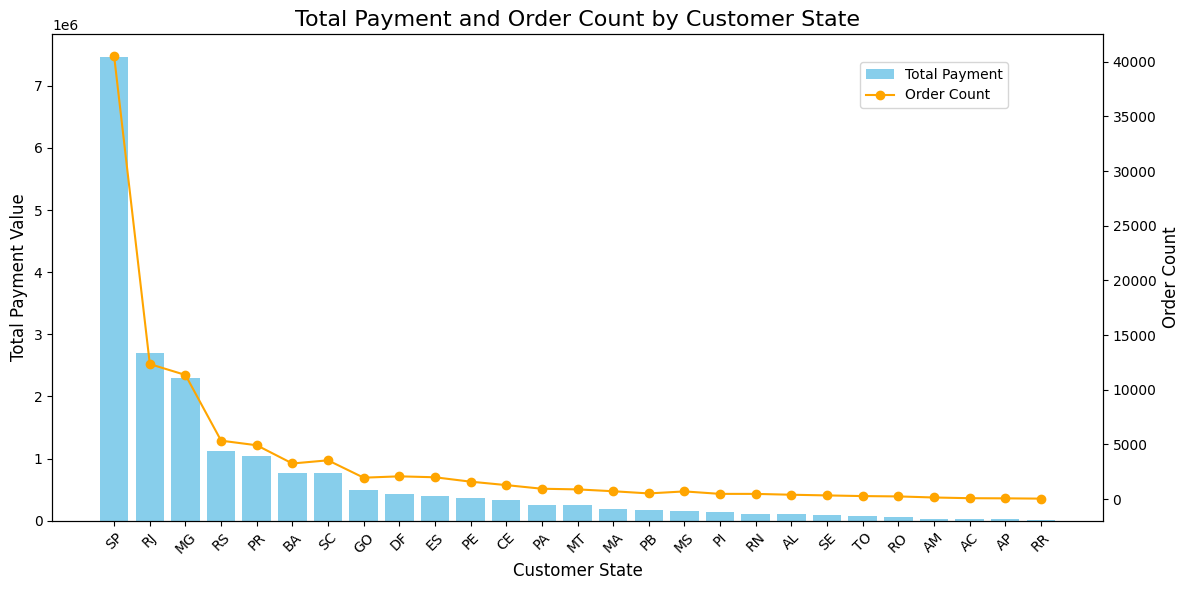

In [56]:
# Mengelompokkan berdasarkan negara bagian pelanggan
state_revenue = all_data.groupby('customer_state').agg({
    'order_id': 'nunique',  # Jumlah pesanan unik
    'payment_value': 'sum'  # Total nilai pembayaran
}).reset_index()

# Mengurutkan berdasarkan total pembayaran
state_revenue = state_revenue.sort_values(by='payment_value', ascending=False)

# Visualisasi data
import matplotlib.pyplot as plt

# Bar chart untuk total pembayaran
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(state_revenue['customer_state'], state_revenue['payment_value'], color='skyblue', label='Total Payment')
ax1.set_xlabel('Customer State', fontsize=12)
ax1.set_ylabel('Total Payment Value', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.set_title('Total Payment and Order Count by Customer State', fontsize=16)

# Overlay jumlah pesanan
ax2 = ax1.twinx()
ax2.plot(state_revenue['customer_state'], state_revenue['order_id'], color='orange', marker='o', label='Order Count')
ax2.set_ylabel('Order Count', fontsize=12)

# Tambahkan legenda
fig.legend(loc="upper right", bbox_to_anchor=(0.85, 0.9), fontsize=10)
plt.tight_layout()

# Simpan plot
plt.savefig('data/state_revenue_analysis.png', dpi=300)
plt.show()


### Apakah kategori produk memengaruhi jumlah pesanan dan kisaran skor ulasan yang diberikan?

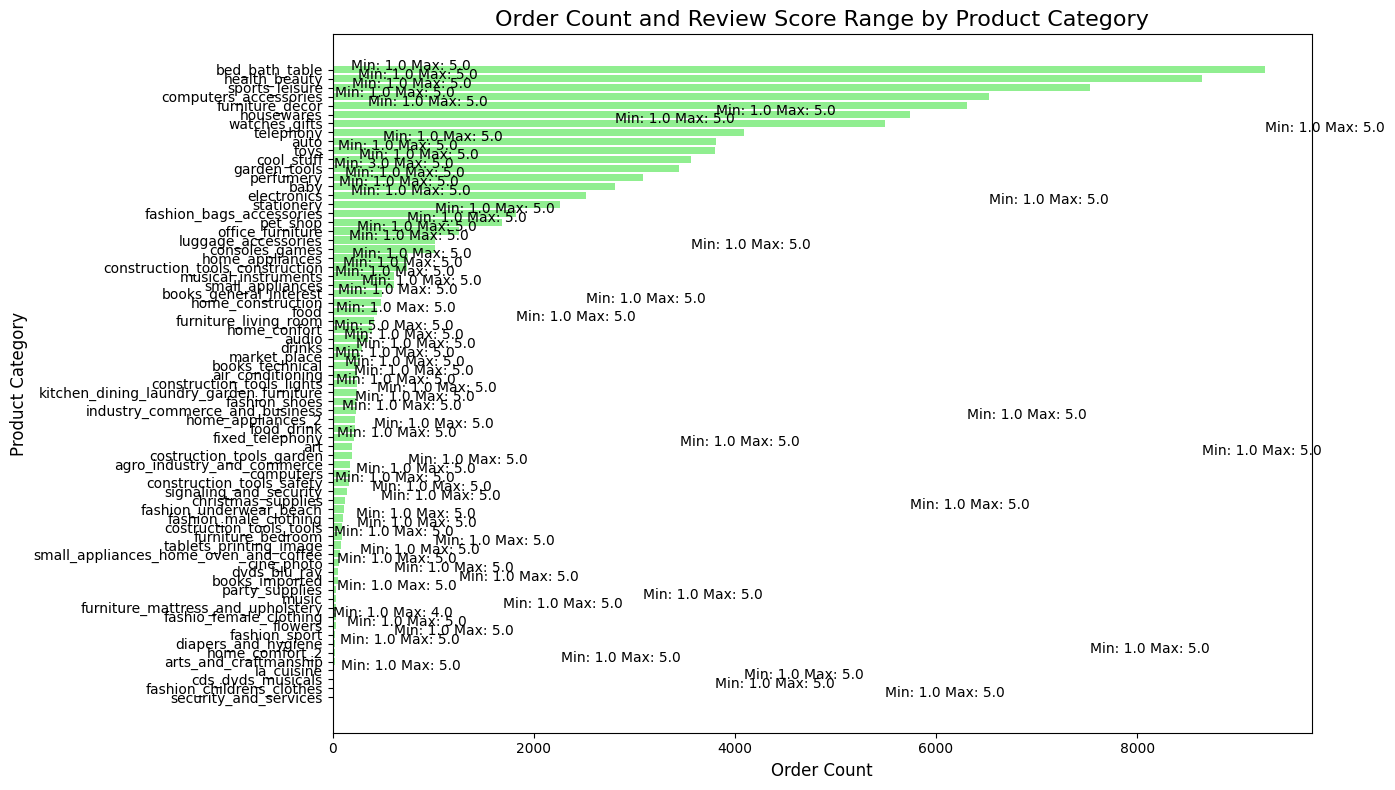

In [57]:
# Mengelompokkan berdasarkan kategori produk
category_analysis = all_data.groupby('product_category_name_english').agg({
    'order_id': 'nunique',  # Jumlah pesanan unik
    'review_score': ['min', 'max']  # Skor ulasan minimum dan maksimum
}).reset_index()

# Menyesuaikan kolom
category_analysis.columns = ['product_category_name_english', 'order_count', 'min_review_score', 'max_review_score']
category_analysis = category_analysis.sort_values(by='order_count', ascending=False)

# Visualisasi data
fig, ax = plt.subplots(figsize=(14, 8))

# Bar chart untuk jumlah pesanan
ax.barh(category_analysis['product_category_name_english'], category_analysis['order_count'], color='lightgreen')
ax.set_xlabel('Order Count', fontsize=12)
ax.set_ylabel('Product Category', fontsize=12)
ax.set_title('Order Count and Review Score Range by Product Category', fontsize=16)

# Overlay skor ulasan
for index, row in category_analysis.iterrows():
    ax.text(row['order_count'] + 2, index, f"Min: {row['min_review_score']} Max: {row['max_review_score']}",
            fontsize=10, color='black')

# Membalikkan sumbu Y agar kategori terpopuler berada di atas
plt.gca().invert_yaxis()

# Simpan plot
plt.tight_layout()
plt.savefig('data/category_review_analysis.png', dpi=300)
plt.show()


## Conclusion

# Negara bagian pelanggan mana yang menyumbang pendapatan terbesar, dan bagaimana distribusi jumlah pesanan di setiap negara bagian?

- Negara bagian SP (São Paulo) merupakan kontributor terbesar terhadap total pendapatan dengan nilai pembayaran yang jauh lebih tinggi dibandingkan negara bagian lainnya.
- Terdapat korelasi antara jumlah pesanan dan total pendapatan. Negara bagian dengan pesanan lebih banyak cenderung memiliki total pembayaran lebih besar.
- Negara bagian lain seperti RJ (Rio de Janeiro) dan MG (Minas Gerais) juga menyumbang jumlah pesanan dan pendapatan yang signifikan, meskipun masih di bawah SP.

# Apakah kategori produk memengaruhi jumlah pesanan dan kisaran skor ulasan yang diberikan?

- Kategori "bed bath table" dan "health beauty" memiliki jumlah pesanan paling banyak, menunjukkan popularitas yang tinggi di kalangan pelanggan.
- Skor ulasan untuk kategori produk berkisar antara 1 (terendah) hingga 5 (tertinggi) di semua kategori, menunjukkan bahwa sebagian besar kategori menerima berbagai tingkat kepuasan pelanggan.
- Kategori dengan jumlah pesanan tinggi menunjukkan potensi keuntungan yang signifikan, tetapi memerlukan perhatian terhadap ulasan untuk meningkatkan pengalaman pelanggan.